# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape: tuple or list, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        x = input_layer if i == 0 else x
        x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0726 11:59:43.997215 4633511360 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 11:59:44.011831 4633511360 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 11:59:44.013626 4633511360 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = 0.001

In [8]:
def get_opt(key):
    if key == 'SGD':
        return keras.optimizers.SGD(lr=LEARNING_RATE, momentum=0.95)
    elif key == 'RMSprop':
        return keras.optimizers.RMSprop(lr=LEARNING_RATE)
    elif key == 'Adagrad':
        return keras.optimizers.Adagrad(lr=LEARNING_RATE, decay=1e-6)
    elif key == 'Adam':
        return keras.optimizers.Adam(lr=LEARNING_RATE)

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for key in ['SGD', 'RMSprop', 'Adagrad', 'Adam']:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(key)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = get_opt(key)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)

    # Collect results
    exp_name_tag = key
    results[exp_name_tag] = {
        'train-loss': model.history.history["loss"],
        'valid-loss': model.history.history["val_loss"],
        'train-acc': model.history.history["acc"],
        'valid-acc': model.history.history["val_acc"]
    }

W0726 11:59:44.087861 4633511360 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0726 11:59:44.088799 4633511360 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0726 11:59:44.151530 4633511360 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 11:59:44.232177 4633511360 deprecation.py:323] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<loc

SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 88us/step - loss:

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.2705 - acc: 0.2173 - val_loss: 1.9189 - val_acc: 0.2979
Epoch 2/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8799 - acc: 0.3228 - val_loss: 1.9012 - val_acc: 0.3062
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7824 - acc: 0.3580 - val_loss: 1.8814 - val_acc: 0.3350
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7098 - acc: 0.3869 - val_loss: 1.6515 - val_acc: 0.4072
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6517 - acc: 0.4102 - val_loss: 1.7590 - val_acc: 0.3680
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6059 - acc: 0.4250 - val_loss: 1.6439 - val_acc: 0.4156
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5661 - acc: 0.4410 - val_loss: 1.6741 - 

50000/50000 [==============================] - 5s 93us/step - loss: 1.8047 - acc: 0.3625 - val_loss: 1.8141 - val_acc: 0.3544
Epoch 3/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.7336 - acc: 0.3892 - val_loss: 1.7163 - val_acc: 0.3932
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6814 - acc: 0.4086 - val_loss: 1.6925 - val_acc: 0.3974
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6433 - acc: 0.4216 - val_loss: 1.6417 - val_acc: 0.4239
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6097 - acc: 0.4341 - val_loss: 1.6550 - val_acc: 0.4141
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5870 - acc: 0.4423 - val_loss: 1.6060 - val_acc: 0.4265
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5658 - acc: 0.4485 - val_loss: 1.5933 - val_acc: 0.4300
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5456 - acc: 0.4476 - val_loss: 1.5488 - val_acc: 0.4549
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5070 - acc: 0.4603 - val_loss: 1.5363 - val_acc: 0.4576
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4624 - acc: 0.4784 - val_loss: 1.4641 - val_acc: 0.4797
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4221 - acc: 0.4931 - val_loss: 1.4897 - val_acc: 0.4746
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4022 - acc: 0.5012 - val_loss: 1.4912 - val_acc: 0.4704
Epoch 9/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.3688 - acc: 0.5109 - val_loss: 1.4163 - val_acc: 0.4992
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.3395 - acc: 0.5222 - val_loss: 1.4186 - val_acc: 0.5050
Epoch 11/50
50000/50000 [========

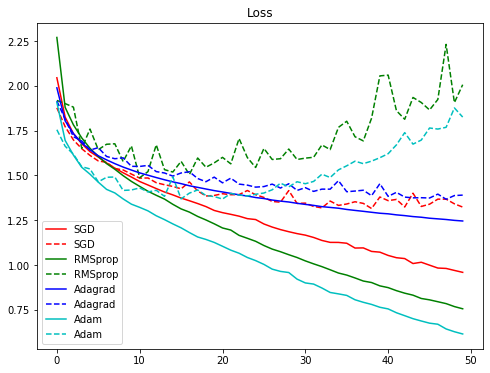

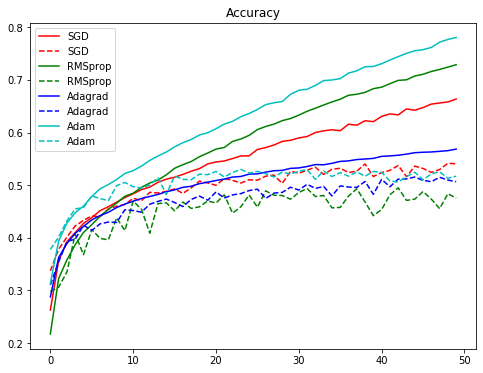

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "c", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 參考資料

#### CSDN - 常見優化器方法總結：

- SGD (mini-batch)
    - 在單步更新與全局更新的折衷辦法，通常搭配 momentum 穩定收斂方向與結果。
    - 收斂速度較慢。
- RMSprop
    - 學習率的調整是根據過去梯度的狀況調整，收斂速度快又不易會出現 learning rate 快速下降的狀況。
- Adam
    - 同樣是可以根據過去的梯度自行調整 learning rate，但校正方式考量一、二階矩陣，使其更加平穩。

在實作過程中，建議先使用 Adam 驗證，若要做最終的優化，則再改用 SGD 找到最佳參數。

參考連結：

- http://cs231n.github.io/assets/nn3/opt2.gif
![](https://ai100-fileentity.cupoy.com/2nd/homework/D80/1563173584317/large)
- http://cs231n.github.io/assets/nn3/opt1.gif
![](https://ai100-fileentity.cupoy.com/2nd/homework/D80/1563173569316/large)
- http://ruder.io/optimizing-gradient-descent/
- [CSDN-優化器方法總結](https://blog.csdn.net/u010089444/article/details/76725843)